In [0]:
import pandas as pd
import numpy as np

import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

from sklearn.model_selection import train_test_split

In [89]:
df = sb.load_dataset('iris') # it loads dataframe
iris = datasets.load_iris() # it loads data in distionary for
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [0]:
#X = df[['sepal_length', 'sepal_width']].values
#Y= df['species'].values

X=iris.data[:, :2] # it just select sepal_length and sepal_width
Y= iris.target
X_train, X_test, y_train, y_test = train_test_split(X,Y, train_size=0.7)

print(X)

for gamma 0.0  ................


In [95]:
from sklearn.svm import SVC
svm_clf = SVC(gamma=0.0000001, kernel='rbf', probability=True)
svm_clf.fit(X, Y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1e-07, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [96]:
pp = svm_clf.predict(X_test)
svm_clf.score(X_test, y_test)

0.8

for gamma 10 ......................


In [97]:
from sklearn.svm import SVC
svm_clf1 = SVC(gamma=10, kernel='rbf', probability=True)
svm_clf1.fit(X, Y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [99]:
pp = svm_clf1.predict(X_test)
svm_clf1.score(X_test, y_test)

0.8444444444444444

for gamma 100 ..................

In [100]:
from sklearn.svm import SVC
svm_clf2 = SVC(gamma=100, kernel='rbf', probability=True)
svm_clf2.fit(X, Y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=100, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [101]:
pp = svm_clf2.predict(X_test)
svm_clf2.score(X_test, y_test)

0.8666666666666667

# Contur Plot

In [0]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1

y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

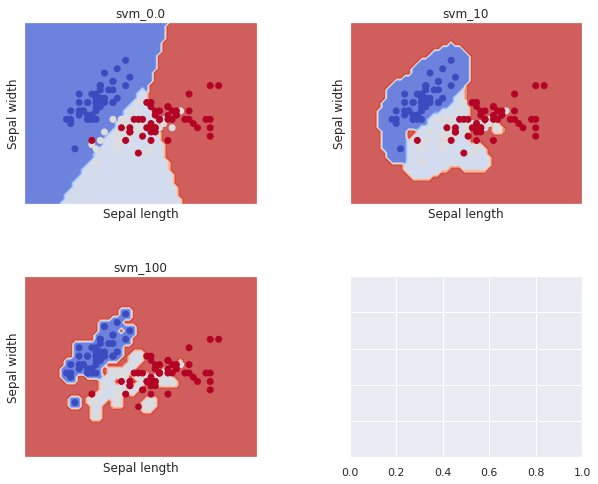

In [111]:
#plt.contour(x,x,y)

plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

titles = ['svm_0.0', 'svm_10','svm_100']
for i, clf in enumerate((svm_clf, svm_clf1, svm_clf2)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()

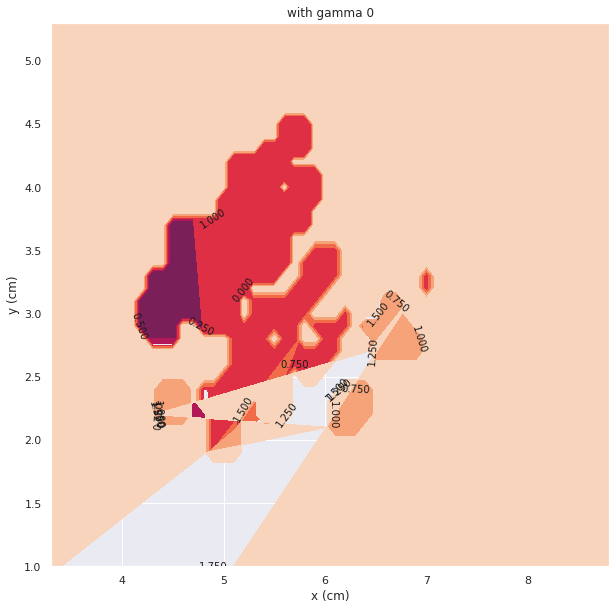

In [143]:
plt.figure(figsize=(10,10))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
contour_filled = plt.contourf(xx, yy, Z, linestyles='dashed')
plt.clabel(contour_filled, inline=True, fontsize=10, colors='k')

# for better vision
#contour_filled = plt.contour(xx, yy, Z, linestyles='dashed')
#plt.colorbar(contour_filled)

plt.title('with gamma 0')
plt.xlabel('x (cm)')
plt.ylabel('y (cm)')
plt.show()

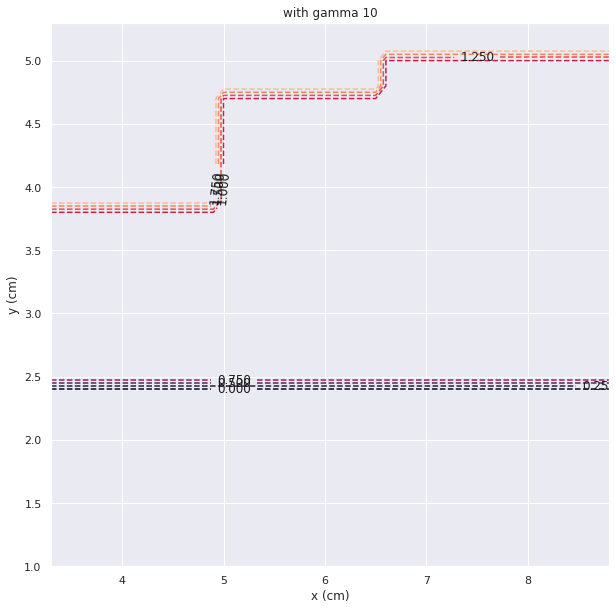

In [144]:
plt.figure(figsize=(10,10))

Z = clf1.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
contour_filled = plt.contour(xx, yy, Z, linestyles='dashed')
plt.clabel(contour_filled, inline=1, colors='k')
#plt.colorbar(contour_filled)

plt.title('with gamma 10')
plt.xlabel('x (cm)')
plt.ylabel('y (cm)')
plt.show()

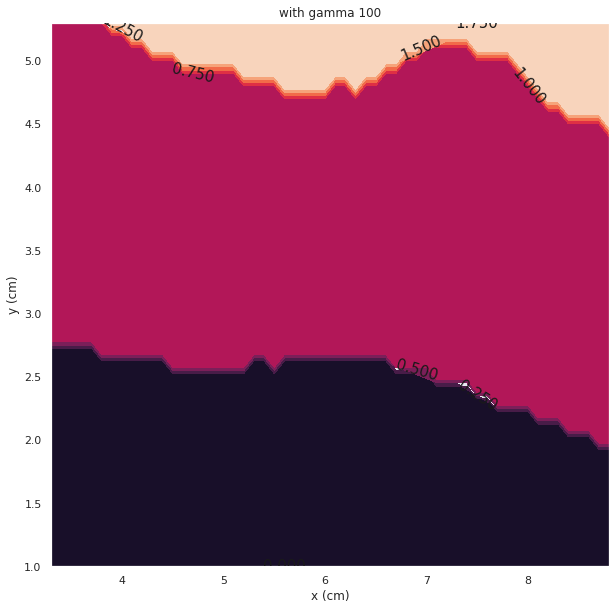

In [141]:
plt.figure(figsize=(10,10))

Z = clf2.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
contour_filled = plt.contourf(xx, yy, Z, linestyles='dashed')
plt.clabel(contour_filled, inline=True, fontsize=15, colors='k')
#plt.colorbar(contour_filled)

plt.title('with gamma 100')
plt.xlabel('x (cm)')
plt.ylabel('y (cm)')
plt.show()

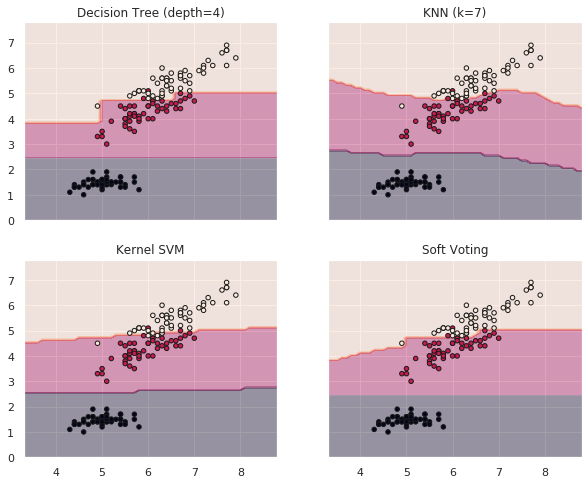

In [76]:
from itertools import product

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

# Loading some example data
iris = datasets.load_iris()
X = iris.data[:, [0, 2]]
y = iris.target

# Training classifiers
clf1 = DecisionTreeClassifier(max_depth=4)
clf2 = KNeighborsClassifier(n_neighbors=7)
clf3 = SVC(gamma=.1, kernel='rbf', probability=True)
eclf = VotingClassifier(estimators=[('dt', clf1), ('knn', clf2),
                                    ('svc', clf3)],
                        voting='soft', weights=[2, 1, 2])

clf1.fit(X, y)
clf2.fit(X, y)
clf3.fit(X, y)
eclf.fit(X, y)

# Plotting decision regions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, clf, tt in zip(product([0, 1], [0, 1]),
                        [clf1, clf2, clf3, eclf],
                        ['Decision Tree (depth=4)', 'KNN (k=7)',
                         'Kernel SVM', 'Soft Voting']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y,
                                  s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()